In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

#### **Data Exploration**

In [51]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# Display the statistics of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
# Count the number of samples in each species
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### **Data Visualization**

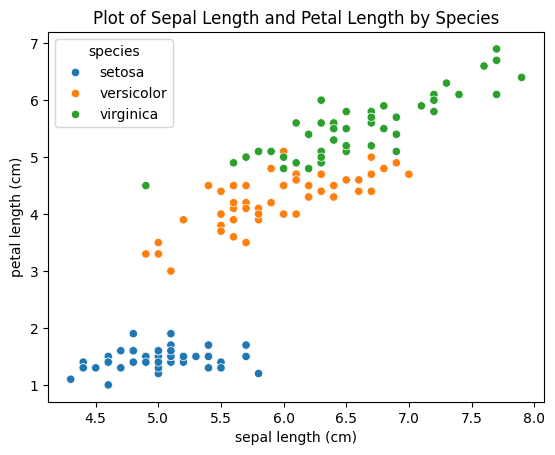

In [54]:
# Plot the distribution of sepal length and petal length
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='tab10')
plt.title("Plot of Sepal Length and Petal Length by Species")
plt.show()

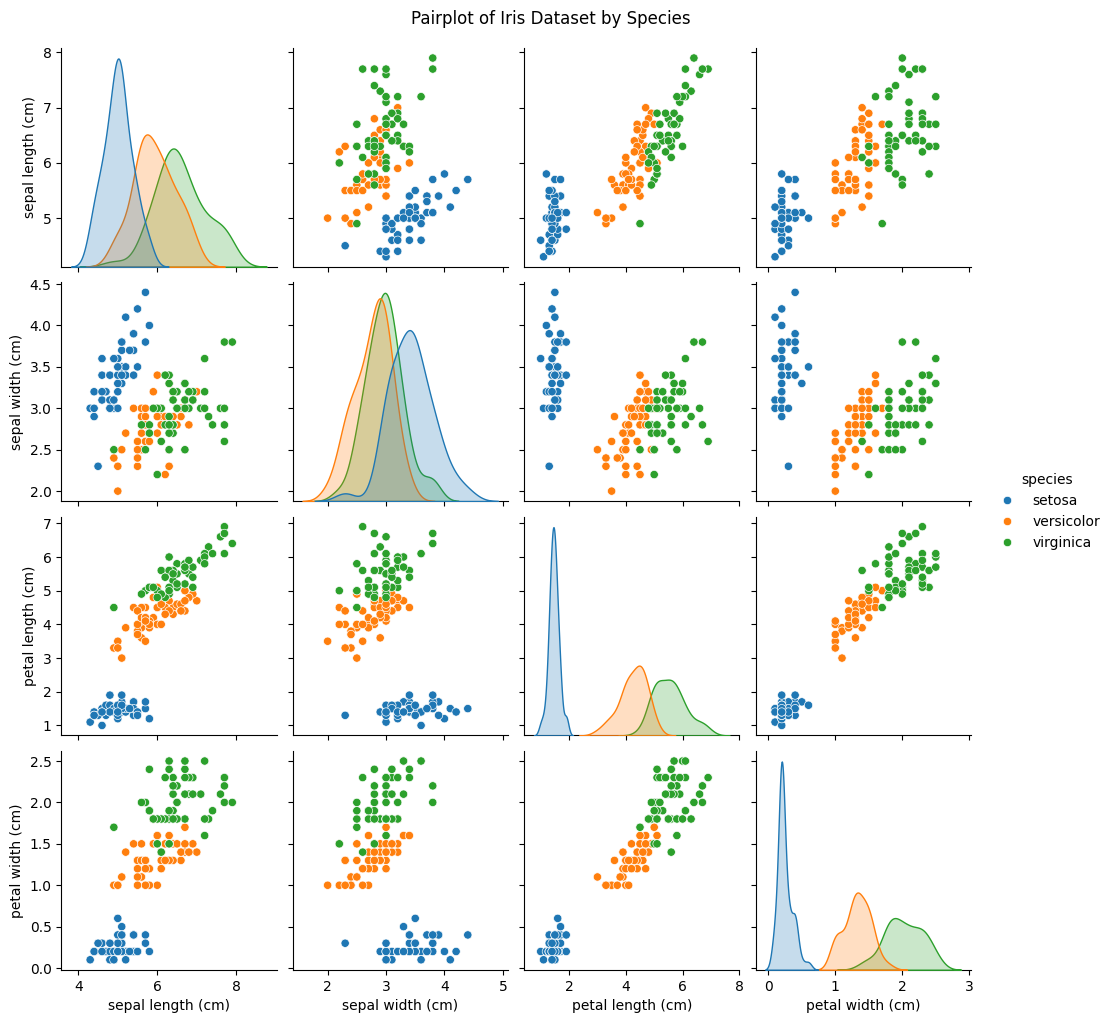

In [55]:
# Plot the distribution of iris dataset by species
sns.pairplot(iris_df, hue='species', palette='tab10')
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()

#### **Model Training**

In [56]:
# Train a KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=42)

#### **Model Evaluation**

In [57]:
# Calculate the model's inertia
model_inertia = kmeans.inertia_
print(f"Model Inertia: {model_inertia:.4f}")

Model Inertia: 78.8557


#### **Model Visualization**

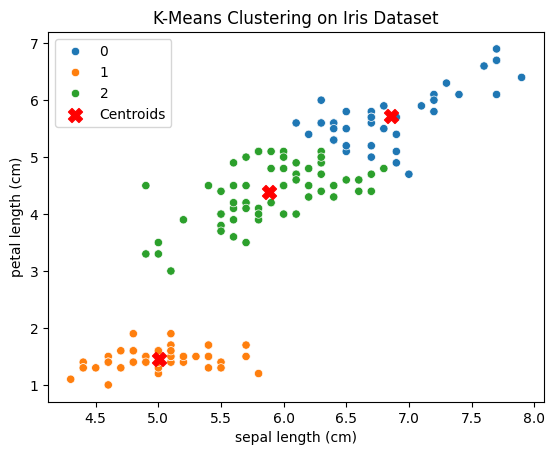

In [58]:
# Add the cluster labels to the DataFrame
iris_df['cluster'] = kmeans.fit_predict(iris.data)

# Plot the clusters along with the centroids
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='cluster', data=iris_df, palette='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color='red', marker='X', s=100, label="Centroids")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

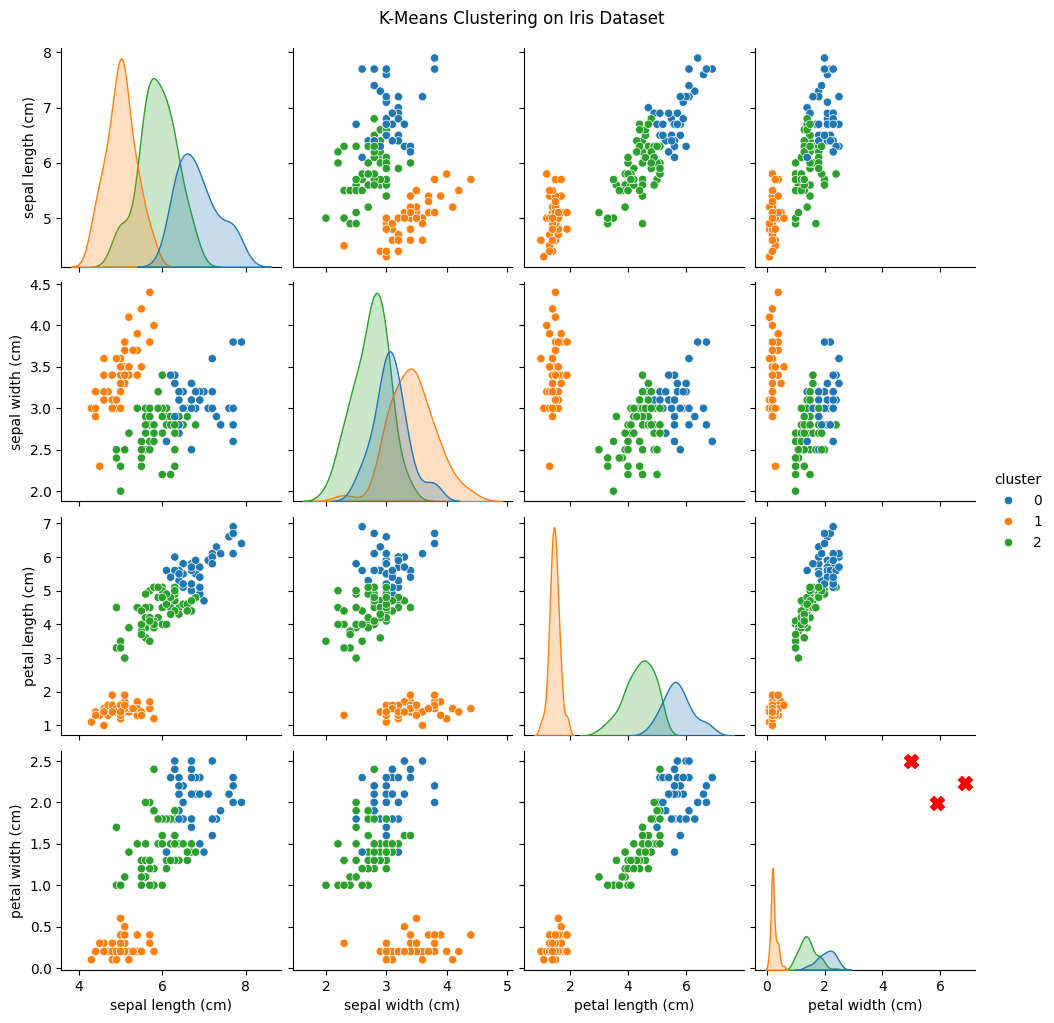

In [ ]:
# Plot the clusters along with the centroids for all four features
sns.pairplot(iris_df, hue='cluster', palette='tab10')
plt.suptitle("K-Means Clustering on Iris Dataset", y=1.02)
plt.show()